In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'merged_dataset_fall.xlsx' 
df = pd.read_excel(file_path)

In [2]:
df.head(10)

,Number,Year,Date of incident,Weekday of incident,Shift,Hospital department or location of incident,Age range of patient,"Type of injury incurred, if any",Presence of companion at time of incident,Location or environment in which the incident ocurred,Fall risk level,Reason for incident,Whether a fall prevention protocol was implemented,Involvement of medication associated with fall risk,Severity of incident,Sex,Whether a restraint prescription was given,Whether a physical therapy prescription was given,Birth decade of patient
0,1,2012,2012-01-02 00:00:00,monday,Afternoon,diagnostic support,60<70,Bruising,No,Waiting room,Moderate,Loss of balance,No,No,adverse event,Female,NaN,NaN,NaN
1,2,2012,2012-01-06 00:00:00,friday,Night,inpatient units,40<50,cut,No,Room,Moderate,Trip,Yes,No,adverse event,Female,NaN,NaN,NaN
2,3,2012,2012-01-10 00:00:00,tuesday,Afternoon,emergency depart,80<90,cut,Yes/Family,Room,High,Trip,Yes,Yes,adverse event,Male,NaN,NaN,NaN
3,4,2012,2012-01-14 00:00:00,saturday,Night,inpatient units,70<80,no injury,No,Room,High,Mental confusion,Yes,No,adverse event,Male,NaN,NaN,NaN
4,5,2012,2012-01-24 00:00:00,tuesday,Night,inpatient units,70<80,no injury,Yes/Family,Bathroom/shower,Moderate,Slip,Yes,No,adverse event,Female,NaN,NaN,NaN
5,6,2012,2012-01-24 00:00:00,tuesday,Morning,inpatient units,80<90,no injury,yes/Nurse,Room,High,Slip,Yes,Yes,adverse event,Male,NaN,NaN,NaN
6,7,2012,2012-01-30 00:00:00,monday,Afternoon,inpatient units,60<70,no injury,No,Bathroom/shower,Moderate,Mental confusion,Yes,Yes,adverse event,Female,NaN,NaN,NaN
7,8,2012,2012-02-03 00:00:00,friday,Afternoon,inpatient units,70<80,no injury,No,Bathroom/shower,High,Slip,Yes,Yes,adverse event,Male,NaN,NaN,NaN
8,9,2012,2012-02-04 00:00:00,saturday,Afternoon,inpatient units,20<30,no injury,Yes/Family,Bathroom/shower,Moderate,Hypotension,Yes,No,adverse event,Male,NaN,NaN,NaN
9,10,2012,2012-02-04 00:00:00,saturday,Morning,inpatient units,40<50,no injury,No,Room,Moderate,Motor Deficit,Yes,No,adverse event,Male,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Number                                                 1070 non-null   int64 
 1   Year                                                   1070 non-null   int64 
 2   Date of incident                                       1070 non-null   object
 3   Weekday of incident                                    1070 non-null   object
 4   Shift                                                  1070 non-null   object
 5   Hospital department or location of incident            1070 non-null   object
 6   Age range of patient                                   1070 non-null   object
 7   Type of injury incurred, if any                        1070 non-null   object
 8   Presence of companion at time of incident              106

In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
train_missing= missing_values_table(df)
train_missing

Your selected dataframe has 19 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Birth decade of patient,509,47.6
Whether a physical therapy prescription was given,465,43.5
Whether a restraint prescription was given,310,29.0
Presence of companion at time of incident,1,0.1
Fall risk level,1,0.1
Sex,1,0.1


<Axes: >

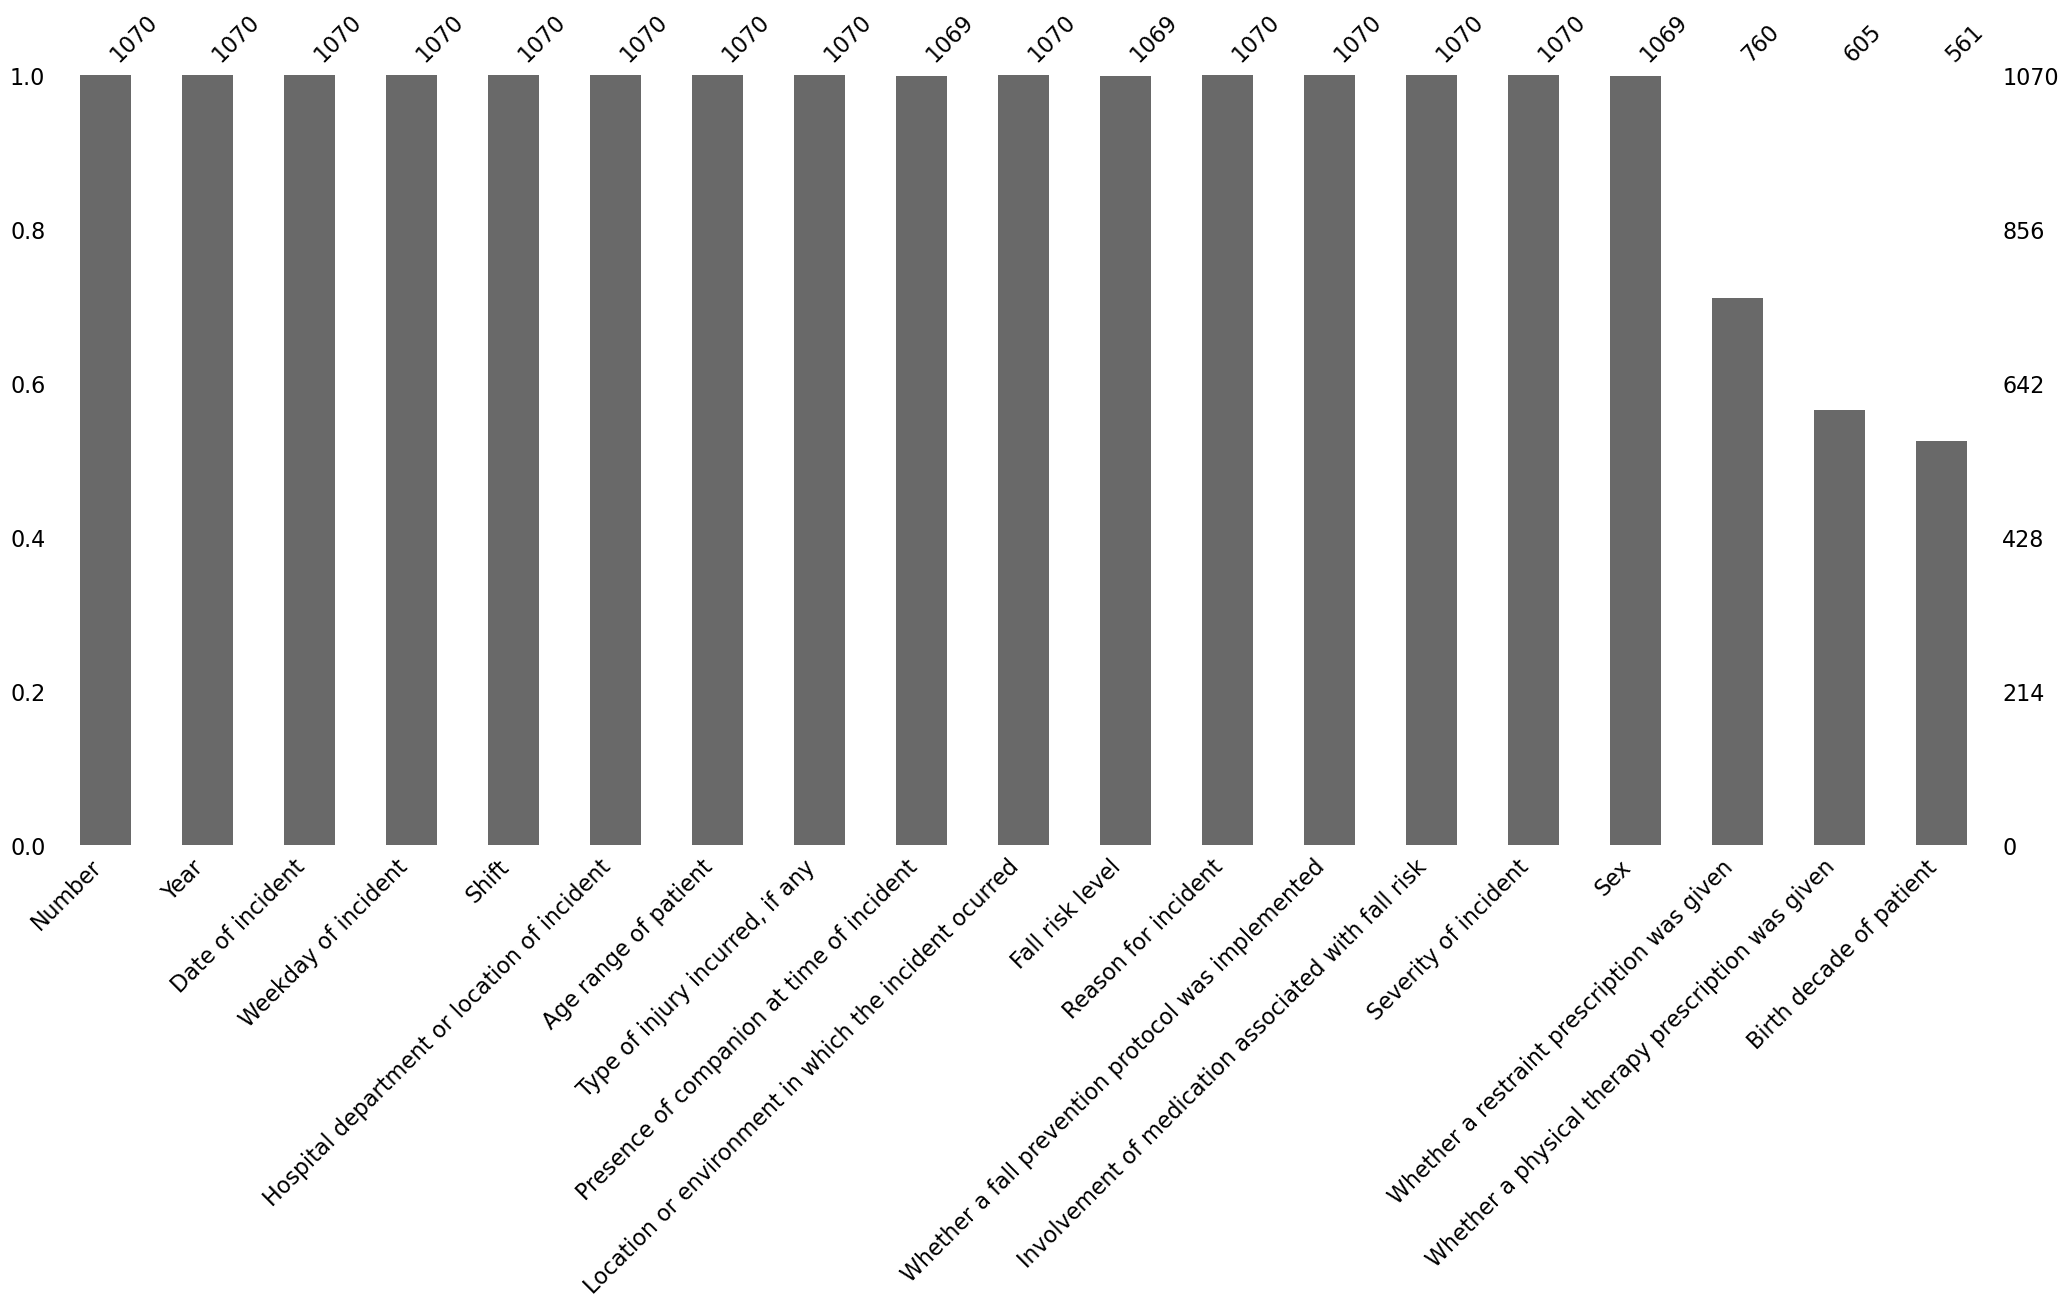

In [5]:
import missingno as msno
msno.bar(df)

In [6]:
df.isnull().sum()

Number                                                     0
Year                                                       0
Date of incident                                           0
Weekday of incident                                        0
Shift                                                      0
Hospital department or location of incident                0
Age range of patient                                       0
Type of injury incurred, if any                            0
Presence of companion at time of incident                  1
Location or environment in which the incident ocurred      0
Fall risk level                                            1
Reason for incident                                        0
Whether a fall prevention protocol was implemented         0
Involvement of medication associated with fall risk        0
Severity of incident                                       0
Sex                                                        1
Whether a restraint pres

In [7]:
from sklearn.impute import SimpleImputer
train_most_frequent = df.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

train_most_frequent.isnull().sum()


Number                                                   0
Year                                                     0
Date of incident                                         0
Weekday of incident                                      0
Shift                                                    0
Hospital department or location of incident              0
Age range of patient                                     0
Type of injury incurred, if any                          0
Presence of companion at time of incident                0
Location or environment in which the incident ocurred    0
Fall risk level                                          0
Reason for incident                                      0
Whether a fall prevention protocol was implemented       0
Involvement of medication associated with fall risk      0
Severity of incident                                     0
Sex                                                      0
Whether a restraint prescription was given              

In [8]:
df = train_most_frequent

In [9]:
df['Fall risk level']

0       Moderate
1       Moderate
2           High
3           High
4       Moderate
          ...   
1065         Low
1066        High
1067    Moderate
1068        High
1069        High
Name: Fall risk level, Length: 1070, dtype: object

In [10]:
# Define the mapping
label_mapping = {"Low": 0, "Moderate": 1, "High": 2}


df['Fall risk level'] = df['Fall risk level'].map(label_mapping)

In [11]:
df['Fall risk level']

0       1
1       1
2       2
3       2
4       1
       ..
1065    0
1066    2
1067    1
1068    2
1069    2
Name: Fall risk level, Length: 1070, dtype: int64

In [10]:
# Define the mapping
label_mapping = {"No": 0, "Yes": 1}


df['Whether a fall prevention protocol was implemented'] = df['Whether a fall prevention protocol was implemented'].map(label_mapping)

In [12]:
df['Age range of patient'].value_counts()

Age range of patient
70<80    281
80<90    230
60<70    194
50<60     97
40<50     73
30<40     59
≥ 90      53
20<30     37
1<13      23
1<13      11
< 1        7
13<20      5
Name: count, dtype: int64

In [13]:
# Mapping dictionary
age_mapping = {
    "60<70": 65,
    "50<60": 55,
    "40<50": 45,
    "80<90": 85,
    "70<80": 75,
    "30<40": 35,
    "20<30": 25,
    "1<13": 7,
    "1<13": 7,
    "13<20": 16,
    "≥ 90": 90,
    "< 1": 1
}

df['Age range of patient'] = df['Age range of patient'].map(age_mapping)

df['Age range of patient'].value_counts()


Age range of patient
75.0    281
85.0    230
65.0    194
55.0     97
45.0     73
35.0     59
90.0     53
25.0     37
7.0      23
1.0       7
16.0      5
Name: count, dtype: int64

In [14]:
df['Age range of patient'].fillna(7, inplace=True)

In [15]:
df.isnull().sum()

Number                                                   0
Year                                                     0
Date of incident                                         0
Weekday of incident                                      0
Shift                                                    0
Hospital department or location of incident              0
Age range of patient                                     0
Type of injury incurred, if any                          0
Presence of companion at time of incident                0
Location or environment in which the incident ocurred    0
Fall risk level                                          0
Reason for incident                                      0
Whether a fall prevention protocol was implemented       0
Involvement of medication associated with fall risk      0
Severity of incident                                     0
Sex                                                      0
Whether a restraint prescription was given              

In [16]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Compute summary statistics
summary_stats = df[numerical_cols].describe()
summary_stats

,Number,Year,Age range of patient,Fall risk level
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,91.063551,2014.657944,65.364486,1.545794
std,53.921414,1.698182,20.728903,0.584534
min,1.000000,2012.000000,1.000000,0.000000
25%,45.000000,2013.000000,55.000000,1.000000
50%,90.000000,2015.000000,75.000000,2.000000
75%,134.000000,2016.000000,85.000000,2.000000
max,215.000000,2017.000000,90.000000,2.000000


C:\Users\semon\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

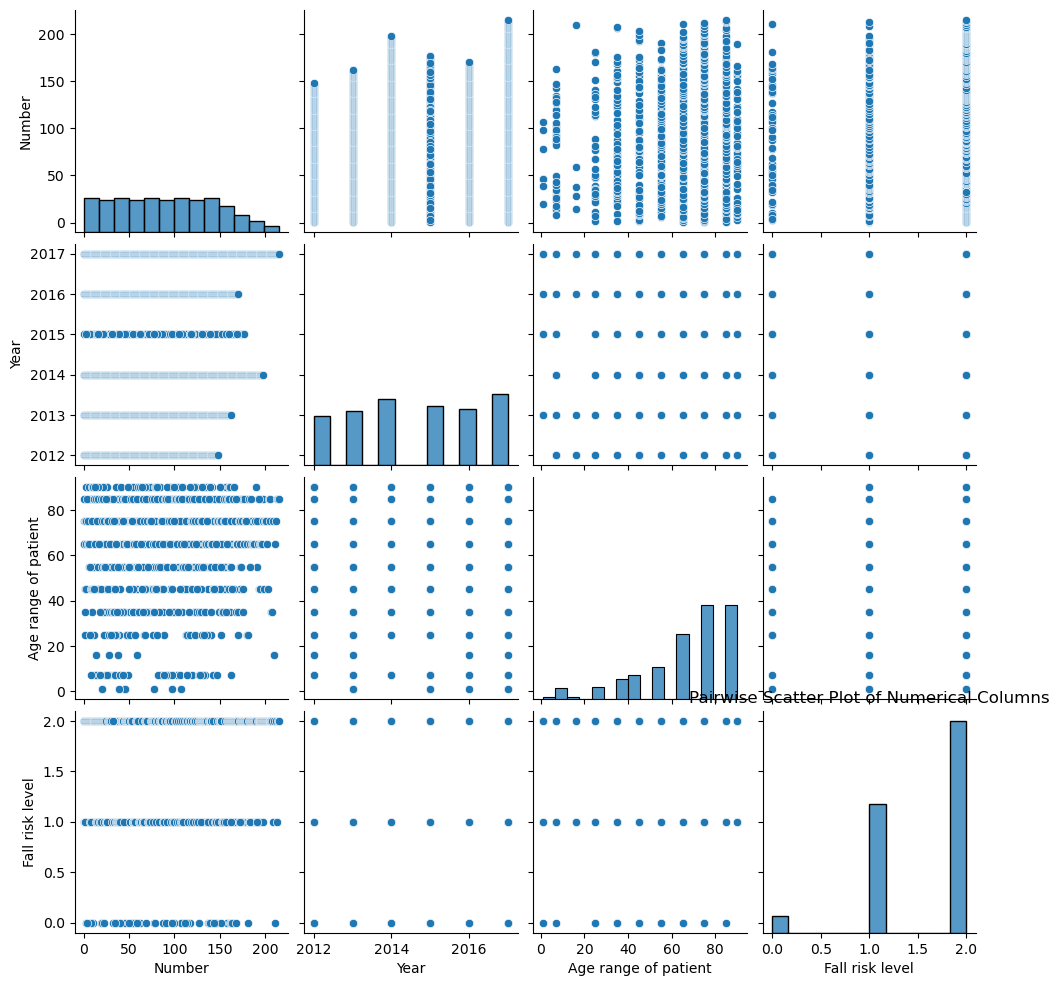

In [17]:
# Scatter plot (pairwise)
plt.figure(figsize=(10, 6))
sns.pairplot(df[numerical_cols])
plt.title('Pairwise Scatter Plot of Numerical Columns')
plt.show()

In [18]:
X = df.drop(columns=['Whether a fall prevention protocol was implemented','Fall risk level', 'Number', 'Date of incident', 'Birth decade of patient', 'Weekday of incident'])
y = df['Whether a fall prevention protocol was implemented']

X

,Year,Shift,Hospital department or location of incident,Age range of patient,"Type of injury incurred, if any",Presence of companion at time of incident,Location or environment in which the incident ocurred,Reason for incident,Involvement of medication associated with fall risk,Severity of incident,Sex,Whether a restraint prescription was given,Whether a physical therapy prescription was given
0,2012,Afternoon,diagnostic support,65.0,Bruising,No,Waiting room,Loss of balance,No,adverse event,Female,No,Yes
1,2012,Night,inpatient units,45.0,cut,No,Room,Trip,No,adverse event,Female,No,Yes
2,2012,Afternoon,emergency depart,85.0,cut,Yes/Family,Room,Trip,Yes,adverse event,Male,No,Yes
3,2012,Night,inpatient units,75.0,no injury,No,Room,Mental confusion,No,adverse event,Male,No,Yes
4,2012,Night,inpatient units,75.0,no injury,Yes/Family,Bathroom/shower,Slip,No,adverse event,Female,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2017,Afternoon,oncology,65.0,HEMATOMA,No,Hallway,Trip,No,adverse event,F,No,No
1066,2017,Night,inpatint units,75.0,excoriation,Yes,Room,Loss of balance,Yes,adverse event,F,No,No
1067,2017,Morning,oncology,85.0,Bruising,Yes/Nurse,Others,Trip,No,adverse event,M,No,No
1068,2017,Morning,oncology,85.0,excoriation,Yes,Hallway,Trip,No,adverse event,F,No,No


In [19]:
X = df.drop(columns=['Fall risk level', 'Number', 'Date of incident', 'Birth decade of patient', 'Weekday of incident'])
y = df['Fall risk level']

X

,Year,Shift,Hospital department or location of incident,Age range of patient,"Type of injury incurred, if any",Presence of companion at time of incident,Location or environment in which the incident ocurred,Reason for incident,Whether a fall prevention protocol was implemented,Involvement of medication associated with fall risk,Severity of incident,Sex,Whether a restraint prescription was given,Whether a physical therapy prescription was given
0,2012,Afternoon,diagnostic support,65.0,Bruising,No,Waiting room,Loss of balance,No,No,adverse event,Female,No,Yes
1,2012,Night,inpatient units,45.0,cut,No,Room,Trip,Yes,No,adverse event,Female,No,Yes
2,2012,Afternoon,emergency depart,85.0,cut,Yes/Family,Room,Trip,Yes,Yes,adverse event,Male,No,Yes
3,2012,Night,inpatient units,75.0,no injury,No,Room,Mental confusion,Yes,No,adverse event,Male,No,Yes
4,2012,Night,inpatient units,75.0,no injury,Yes/Family,Bathroom/shower,Slip,Yes,No,adverse event,Female,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2017,Afternoon,oncology,65.0,HEMATOMA,No,Hallway,Trip,No,No,adverse event,F,No,No
1066,2017,Night,inpatint units,75.0,excoriation,Yes,Room,Loss of balance,Yes,Yes,adverse event,F,No,No
1067,2017,Morning,oncology,85.0,Bruising,Yes/Nurse,Others,Trip,No,No,adverse event,M,No,No
1068,2017,Morning,oncology,85.0,excoriation,Yes,Hallway,Trip,No,No,adverse event,F,No,No


In [20]:
# Categorical Encoding
demo = pd.get_dummies(X['Presence of companion at time of incident'])
demo

,No,Yes,"Yes, Family","Yes, Nurse",Yes/ Caregiver,Yes/ Family,Yes/EQUIPE,Yes/Family,Yes/Nurse,Yes/Physician,Yes/cargiver,yes/Caregiver,yes/Nurse,yes/Physical therapist,yes/Physical therapist,yes/Physician
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1066,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1067,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1068,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
# Categorical Encoding
X = pd.get_dummies(X)
X

,Year,Age range of patient,Shift_Afternoon,Shift_Morning,Shift_Night,Hospital department or location of incident_A1,Hospital department or location of incident_Adult ACI,Hospital department or location of incident_Adult ICU,Hospital department or location of incident_Comunity,Hospital department or location of incident_Ob&Gyb/Birth,...,Sex_F,Sex_Female,Sex_M,Sex_Male,Sex_f,Whether a restraint prescription was given_No,Whether a restraint prescription was given_NÂO,Whether a restraint prescription was given_Yes,Whether a physical therapy prescription was given_No,Whether a physical therapy prescription was given_Yes
0,2012,65.0,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,2012,45.0,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,2012,85.0,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
3,2012,75.0,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
4,2012,75.0,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2017,65.0,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
1066,2017,75.0,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
1067,2017,85.0,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1068,2017,85.0,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False


In [22]:
y

0       1
1       1
2       2
3       2
4       1
       ..
1065    0
1066    2
1067    1
1068    2
1069    2
Name: Fall risk level, Length: 1070, dtype: int64

In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#-------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#-------------------------------------
from scipy.stats import shapiro

#-------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#-------------------------------------
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

#-------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from statsmodels.stats.outliers_influence import variance_inflation_factor



#------------------------------------- 
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [24]:
x_train_randOverSample = X.copy()
y_train_randOverSample = y.copy()

print("Before OverSampling- counts of label '0': {}".format(sum(y==0)))
print("Before OverSampling- counts of label '1': {} \n".format(sum(y==1)))
#print("Before OverSampling- counts of label '2': {} \n".format(sum(y==2)))
print("*******************************************************************")

randOverSample = RandomOverSampler(random_state=100,)
x_train_randOverSample, y_train_randOverSample = randOverSample.fit_resample(x_train_randOverSample, y_train_randOverSample.ravel())

print('After OverSampling with RandomOverSampler- x_train: {}'.format(x_train_randOverSample.shape))
print('After OverSampling with RandomOverSampler- y_train: {} \n'.format(y_train_randOverSample.shape))

print("After OverSampling with RandomOverSampler- counts of label '0': {}".format(sum(y_train_randOverSample==0)))
print("After OverSampling with RandomOverSampler- counts of label '1': {}".format(sum(y_train_randOverSample==1)))
#print("After OverSampling with RandomOverSampler- counts of label '2': {}".format(sum(y_train_randOverSample==2)))


X = x_train_randOverSample
y = y_train_randOverSample

Before OverSampling- counts of label '0': 50
Before OverSampling- counts of label '1': 386 

*******************************************************************
After OverSampling with RandomOverSampler- x_train: (1902, 113)
After OverSampling with RandomOverSampler- y_train: (1902,) 

After OverSampling with RandomOverSampler- counts of label '0': 634
After OverSampling with RandomOverSampler- counts of label '1': 634


In [137]:
x_train_smote = X.copy()
y_train_smote = y.copy()

print("Before OverSampling- counts of label '0': {}".format(sum(y==0)))
print("Before OverSampling- counts of label '1': {} \n".format(sum(y==1)))
print("Before OverSampling- counts of label '2': {} \n".format(sum(y==2)))
print("*******************************************************************")

sm = SMOTE(random_state=100)
x_train_smote, y_train_smote = sm.fit_resample(x_train_smote, y_train_smote.ravel())

print('After OverSampling with SMOTE- x_train: {}'.format(x_train_smote.shape))
print('After OverSampling with SMOTE- y_train: {} \n'.format(y_train_smote.shape))

print("After OverSampling with SMOTE- counts of label '0': {}".format(sum(y_train_smote==0)))
print("After OverSampling with SMOTE- counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling with SMOTE- counts of label '2': {}".format(sum(y_train_smote==2)))


X = x_train_smote
y = y_train_smote




Before OverSampling- counts of label '0': 50
Before OverSampling- counts of label '1': 386 

Before OverSampling- counts of label '2': 634 

*******************************************************************


AttributeError: 'NoneType' object has no attribute 'split'

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X, y)
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

df_feature_scores = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)


df_feature_scores.head(20)

,feature importance
Age range of patient,0.140844
Whether a fall prevention protocol was implemented_Yes,0.064930
Year,0.058103
Whether a fall prevention protocol was implemented_No,0.057341
Involvement of medication associated with fall risk_Yes,0.030631
Location or environment in which the incident ocurred_Room,0.028655
Reason for incident_Loss of balance,0.028051
Shift_Morning,0.025158
Presence of companion at time of incident_No,0.024425
Reason for incident_Hypotension,0.024060


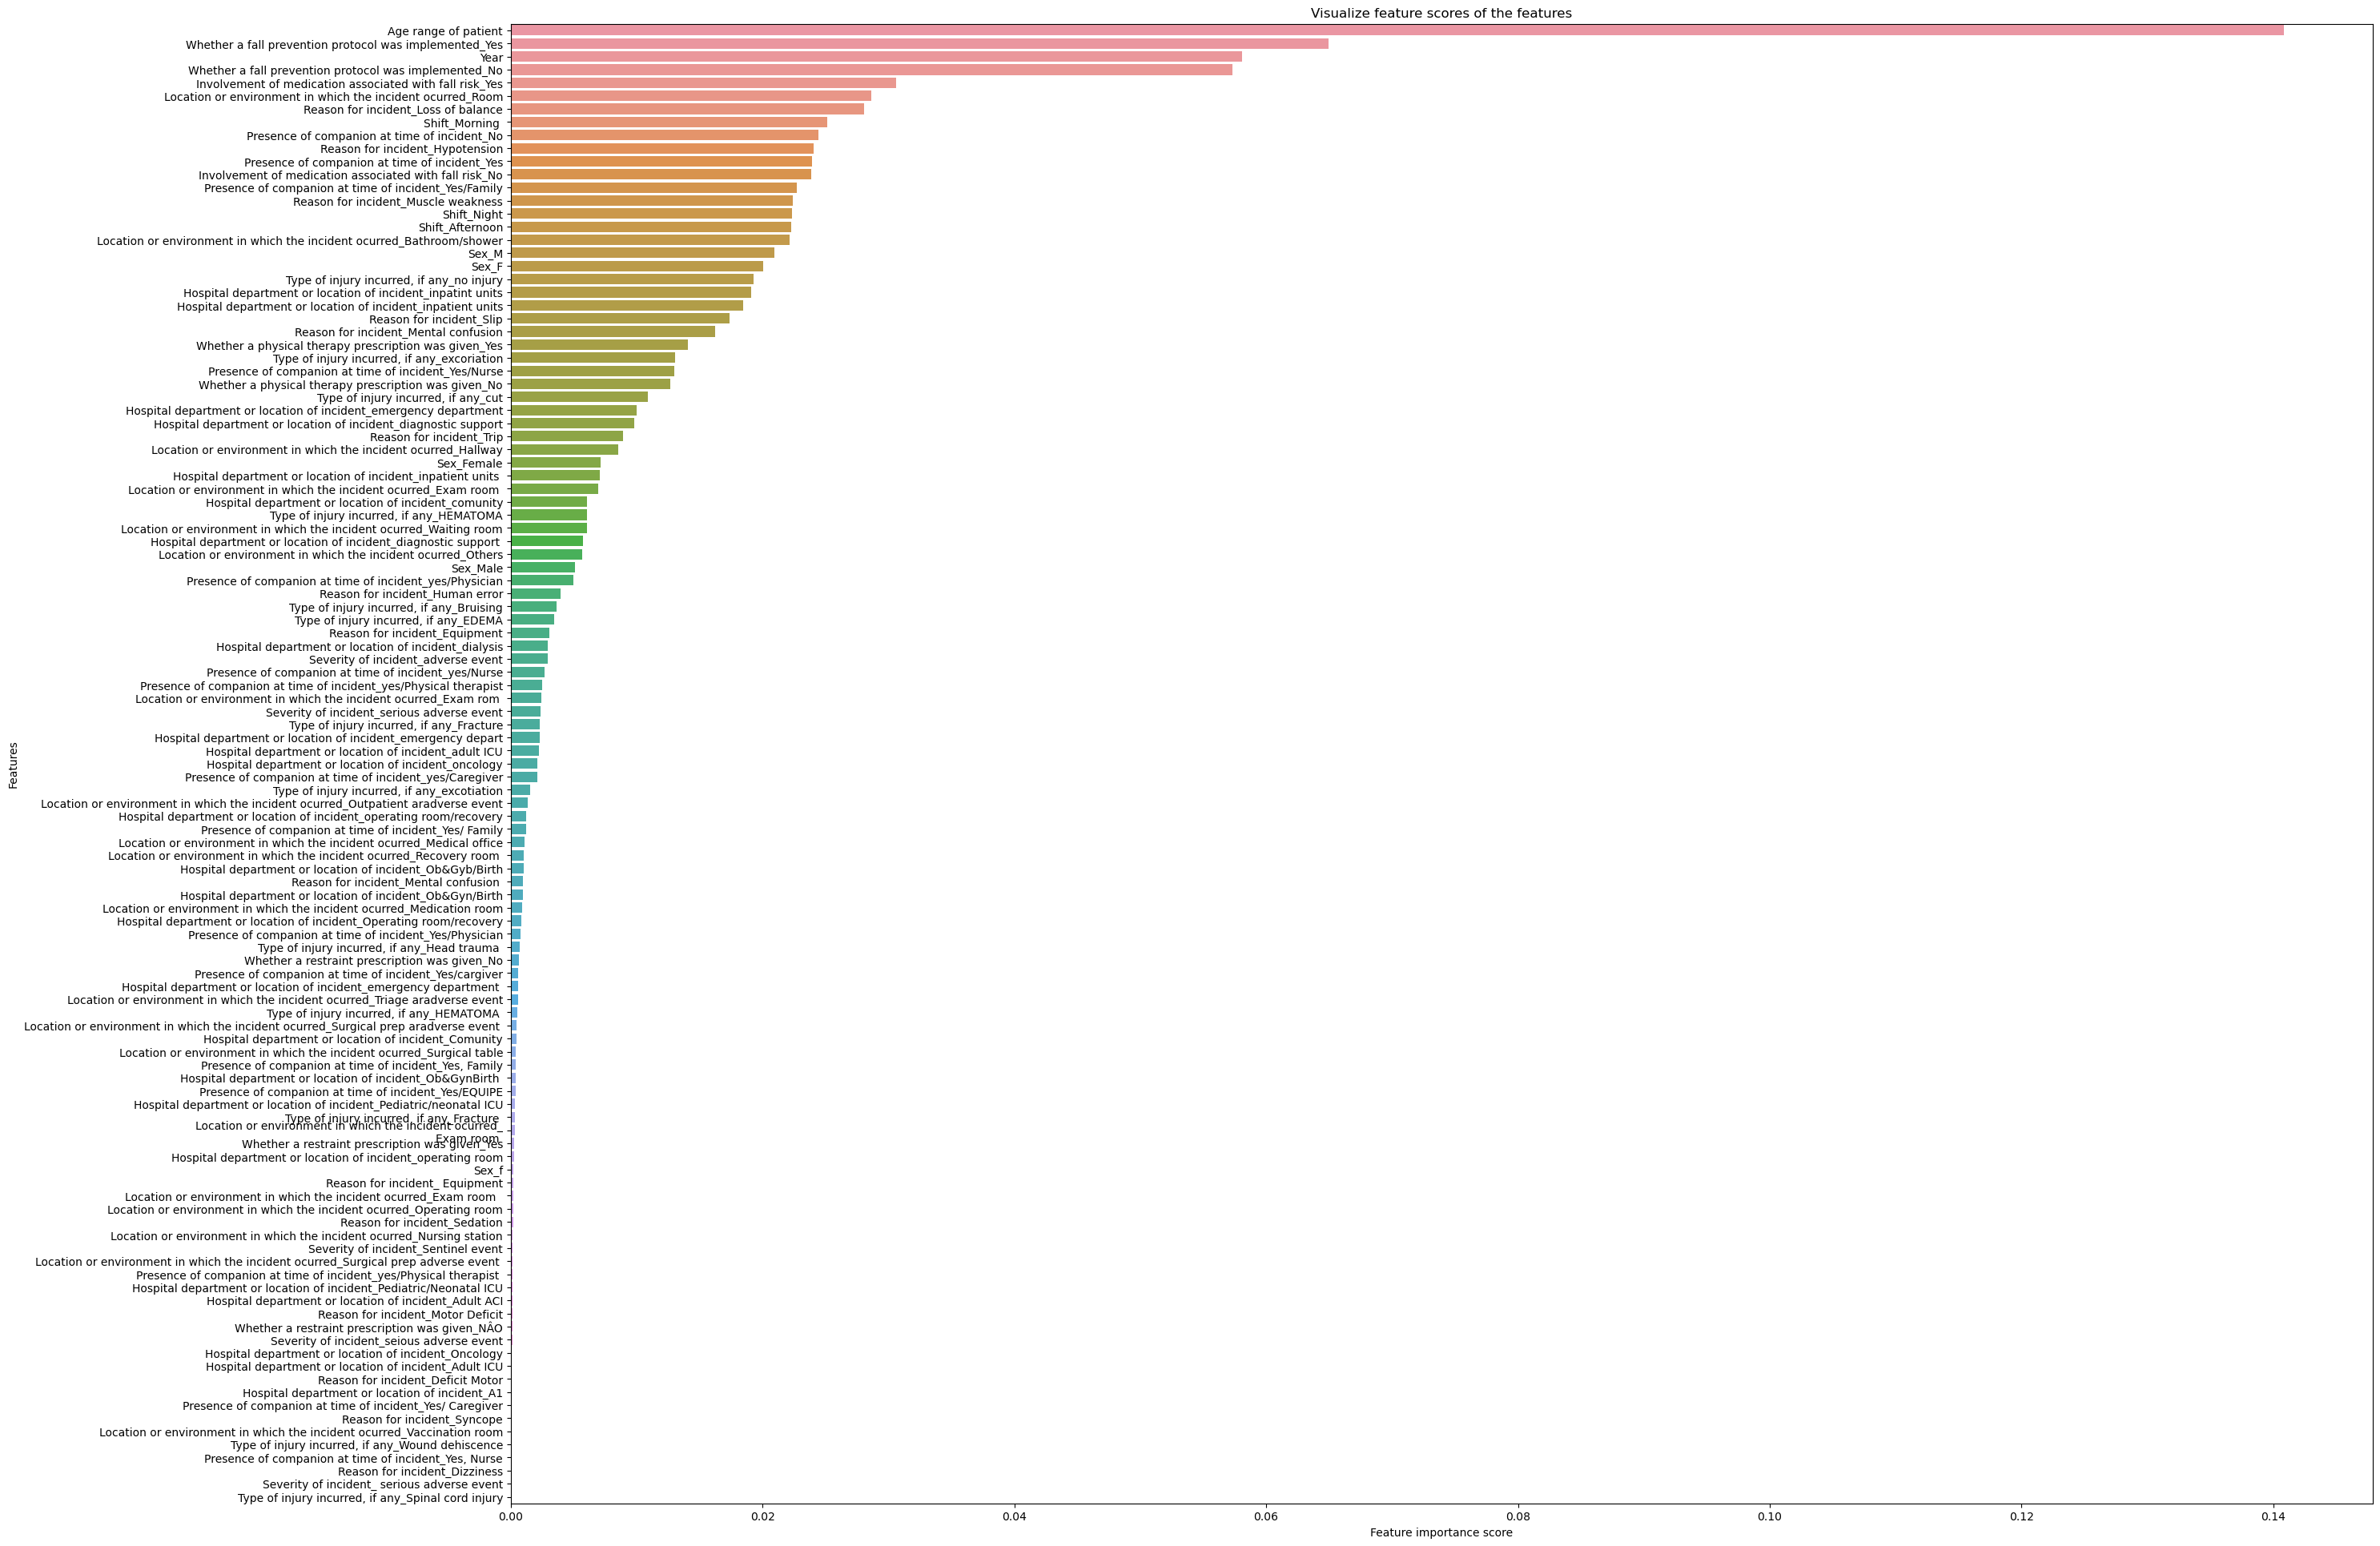

In [26]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

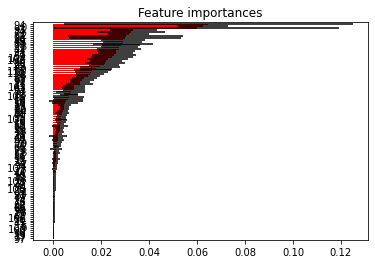

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

<Axes: >

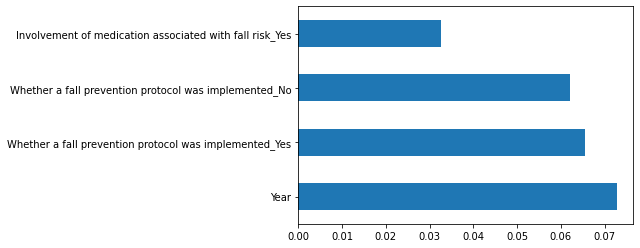

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline          

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh'))        # some method chaining, because it's sexy!

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
##########   SVM

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameter grid

params_grid = {
    'C': [1, 2, 4, 5, 6],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}



svm_model = SVC(random_state=42)


grid_search = GridSearchCV(estimator=svm_model, param_grid=params_grid, cv=5)


grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

y_pred_svm = best_estimator.predict(X_test_scaled)

# Evaluate the model
print("Best Parameters:", best_params)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

KeyboardInterrupt: 

In [29]:
##########  Random Forest (RF)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [10, 50,  100, 200, 300],  
    'max_depth': [ 2, 4, 6, 10],      
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

y_pred_rf_best = best_rf_model.predict(X_test_scaled)

# Evaluate the best model
print("Best Random Forest Parameters:", best_params)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_best))


Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 300}
Random Forest Accuracy: 0.8109243697478992
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       154
           1       0.74      0.72      0.73       159
           2       0.75      0.72      0.73       163

    accuracy                           0.81       476
   macro avg       0.81      0.81      0.81       476
weighted avg       0.81      0.81      0.81       476



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier



rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42) 
svc_model = SVC(kernel='rbf', C=14.0, gamma= 'scale', probability=True, random_state=42) 
mlp_model = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (100,100), max_iter = 500, solver= 'adam', random_state=42)
#mlp_model = MLPClassifier(activation= 'relu', alpha= 0.0001, learning_rate= 'adaptive', hidden_layer_sizes= (200, ), solver= 'adam', random_state=42)
#lr_model = LogisticRegression(C=9.0, solver='liblinear', penalty= 'l2', random_state=42)
                              
estimators = [('random_forest', rf_model),
              ('neural_net', mlp_model)
              #('support_vector_classifier', svc_model)
              #('logistic', lr_model)
]


voting_clf = VotingClassifier(estimators=estimators, voting='soft')


voting_clf.fit(X_train_scaled, y_train)


y_pred_voting = voting_clf.predict(X_test_scaled)

# Evaluate the model
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Voting Classification Report:\n", classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.8256302521008403
Voting Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       154
           1       0.76      0.77      0.76       159
           2       0.77      0.72      0.75       163

    accuracy                           0.83       476
   macro avg       0.82      0.83      0.83       476
weighted avg       0.82      0.83      0.82       476



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

mlp_model = MLPClassifier(random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_mlp_model = grid_search.best_estimator_

y_pred_mlp_best = best_mlp_model.predict(X_test_scaled)

print("Best MLP Parameters:", best_params)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp_best))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp_best))

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc


clf_name = voting_clf
#clf_name = best_rf_model


# Predict probabilities for each model
probs = np.array([clf.predict_proba(X_test_scaled) for clf in clf_name.estimators_])

# Combine probabilities (e.g., by taking the mean)
combined_probs = np.mean(probs, axis=0)

# Make a hard decision based on combined probabilities
combined_preds = np.argmax(combined_probs, axis=1)

# Calculate the AUC score
auc = roc_auc_score(y_test, combined_probs[:, 1])  
print("AUC Score:", auc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, combined_probs[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Plot random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()